In [1]:
import spikeinterface.full as si
import probeinterface as pif
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
import os

In [2]:
npx1_path = os.path.join('E:', 'Dropbox (Dartmouth College)', 'NSB2023', '23242', '01_7_6_23', 'HC101_23242_g0')
npx2_path = os.path.join('E:', 'Dropbox (Dartmouth College)', 'NSB2023', '23242', '02_7_7_23', 'HC_2_Neuro2_g0')

In [3]:
si.get_neo_streams('spikeglx',npx2_path)

(['imec0.ap', 'nidq'], ['imec0.ap', 'nidq'])

In [4]:
meta_filename = os.path.join('E:', 'Dropbox (Dartmouth College)', 'NSB2023', '23242', '02_7_7_23', 'HC_2_Neuro2_g0', 'HC_2_Neuro2_g0_imec0', 'HC_2_Neuro2_g0_t0.imec0.ap.meta')

In [5]:
probe = pif.read_spikeglx(meta_filename)

(<matplotlib.collections.PolyCollection at 0x14e8c62faf0>,
 <matplotlib.collections.PolyCollection at 0x14e8c6e0af0>)

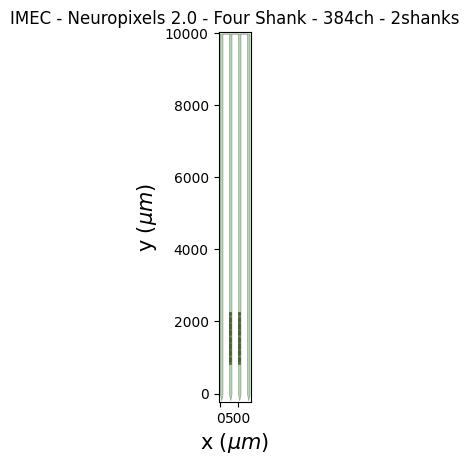

In [7]:
pif.plotting.plot_probe(probe)

In [6]:
raw_rec = si.read_spikeglx(npx2_path, stream_name='imec0.ap')
ttls = si.read_spikeglx(npx2_path, stream_name='nidq')

In [7]:
rec1 = si.highpass_filter(raw_rec, freq_min=400.)
bad_channel_ids, channel_labels = si.detect_bad_channels(rec1)
rec2 = rec1.remove_channels(bad_channel_ids)
print('bad_channel_ids', bad_channel_ids)

rec3 = si.phase_shift(rec2)
rec4 = si.common_reference(rec3, operator="median", reference="global")

bad_channel_ids ['imec0.ap#AP127' 'imec0.ap#AP328']


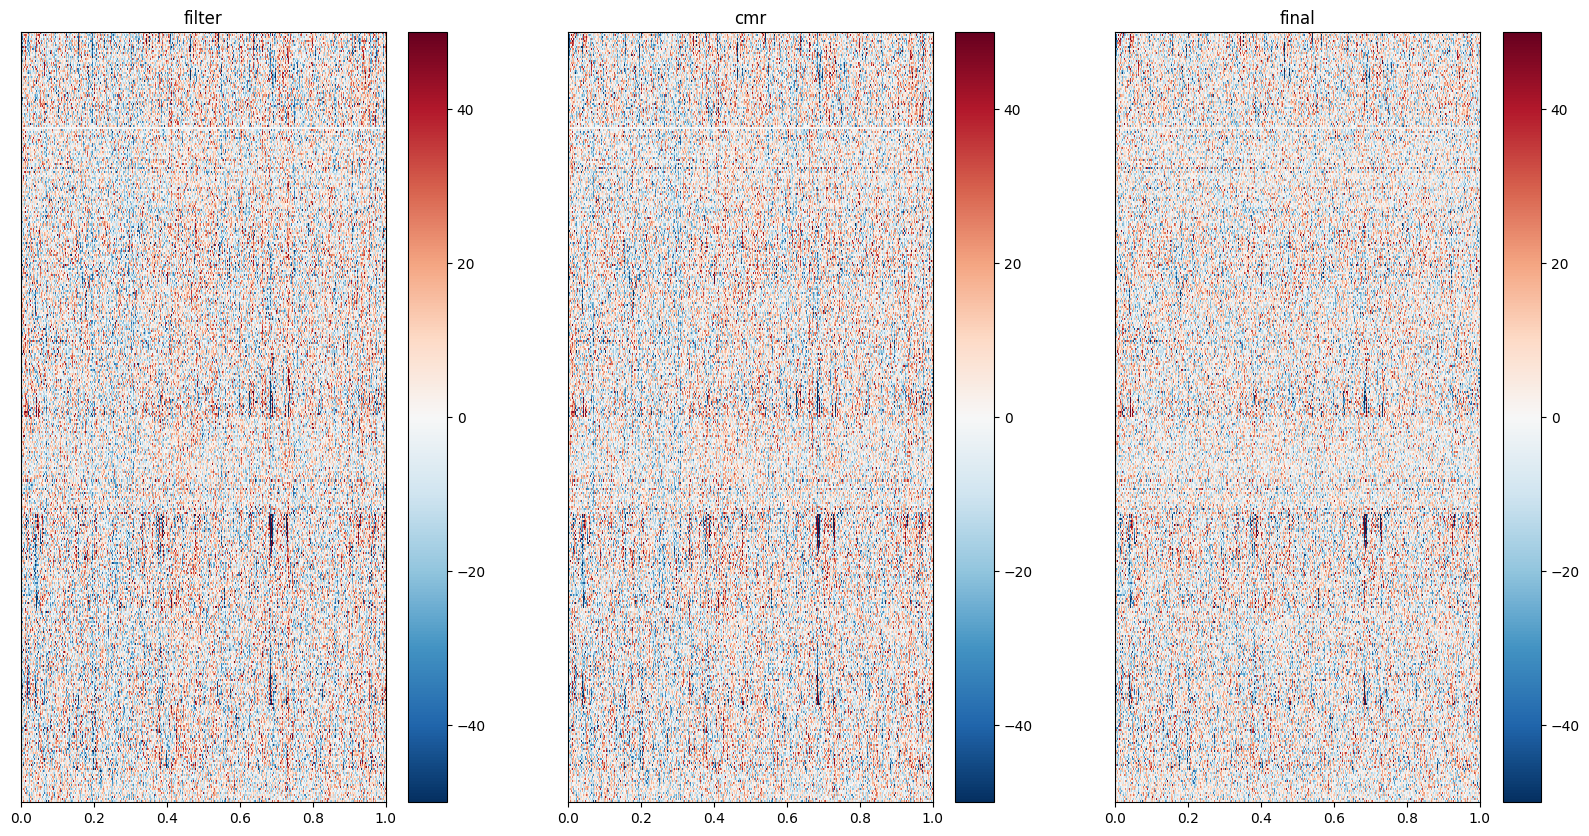

In [8]:
# here we use static plot using matplotlib backend
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))

si.plot_timeseries(rec2, backend='matplotlib',  clim=(-50, 50), ax=axs[0])
si.plot_timeseries(rec3, backend='matplotlib',  clim=(-50, 50), ax=axs[1])
si.plot_timeseries(rec4, backend='matplotlib',  clim=(-50, 50), ax=axs[2])
for i, label in enumerate(('filter', 'cmr', 'final')):
    axs[i].set_title(label)
    
plt.show()

In [10]:
# we can estimate the noise on the scaled traces (microV) or on the raw one (which is in our case int16).
noise_levels_microV = si.get_noise_levels(rec4, return_scaled=True)
noise_levels_int16 = si.get_noise_levels(rec4, return_scaled=False)

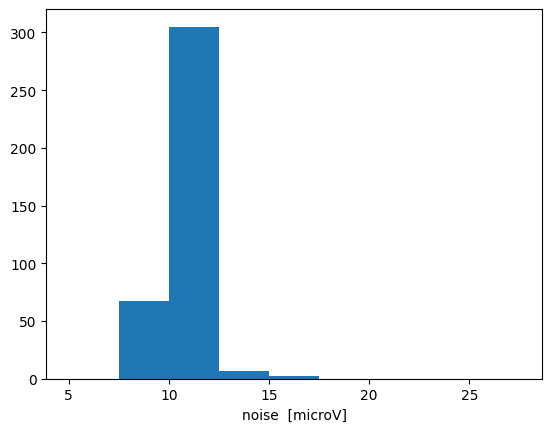

In [18]:
fig, ax = plt.subplots()
_ = ax.hist(noise_levels_microV, bins=np.arange(5, 30, 2.5))
ax.set_xlabel('noise  [microV]')
plt.show()

In [9]:
ks_working_folder = 'F:\\ks2_test'
# Make sure it exits
os.path.exists(ks_working_folder)

True

In [61]:
# job_c4.save(folder=os.path.join(ks_working_folder,kwargs = dict(n_jobs=40, chunk_duration='1s', progress_bar=True)

# rec = re'preprocess'), format='binary', **job_kwargs)

write_binary_recording with n_jobs = 40 and chunk_size = 30000


write_binary_recording:   0%|          | 0/2490 [00:00<?, ?it/s]

In [28]:
# Hacky Step
rec.set_channel_locations(rec4.get_channel_locations())

In [10]:
rec = si.BinaryRecordingExtractor('F:\\ks2_test\\preprocess\\traces_cached_seg0.raw', 30000, 'int16', 382)

In [ ]:
# from spikeinterface.sortingcomponents.peak_detection import detect_peaks

# job_kwargs = dict(n_jobs=40, chunk_duration='1s', progress_bar=True)
# peaks = detect_peaks(rec4,  method='locally_exclusive', noise_levels=noise_levels_int16,
#                      detect_threshold=5, radius_um=50., **job_kwargs)
# peaks

In [11]:
ks2_path = 'D:\\AutomaticSpikeSort\Kilosort-2_5'
si.Kilosort2_5Sorter.set_kilosort2_5_path(ks2_path)
si.Kilosort2_5Sorter.is_installed()

Setting KILOSORT2_5_PATH environment variable for subprocess calls to: D:\AutomaticSpikeSort\Kilosort-2_5


True

In [12]:
ks2_5_params = si.get_default_sorter_params('kilosort2_5')

In [ ]:
sorting = si.run_sorter('kilosort2_5', rec, output_folder=os.path.join(ks_working_folder, 'ks2_output'),
                        verbose=True, remove_existing_folder=False, **ks2_5_params)

In [29]:
np.shape(rec.get_channel_locations())

(382, 2)

'nidq#AX4' is the odor TTL\
'nidq#AX1' is a quadrature signal\
'nidq#AX2' is a quadrature signal

In [ ]:
this_ids = ['nidq#XA1', 'nidq#XA2', 'nidq#XA4']
this_gain = [ttls.get_channel_property(channel_id=x, key='gain_to_uV') for x in this_ids]
this_offset = [ttls.get_channel_property(channel_id=x, key='offset_to_uV') for x in this_ids]

In [ ]:
# TODO Plot quadrature signals and decoded speed
plt.plot(ttls.get_traces(channel_ids=[this_ids[0]])*this_gain[0] + this_offset[0])
plt.plot(ttls.get_traces(channel_ids=[this_ids[1]])*this_gain[1] + this_offset[1])

# Plotting the Odor indicator to see how to threshold

In [ ]:
this_signal = ttls.get_traces(channel_ids=[this_ids[2]])*this_gain[2] + this_offset[2]
plt.plot(this_signal)
plt.axhline(np.mean(this_signal) + np.std(this_signal), color='black')
plt.axhline(np.mean(this_signal) - np.std(this_signal), color='red')
plt.axhline(np.mean(this_signal) - 2.5*np.std(this_signal), color='green')
plt.axhline(np.mean(this_signal) - 3.5*np.std(this_signal), color='black')

In [ ]:
#The onset times are such that they are less than 2.5 SDs 
#and greater than 3.5 SDs but also the previous time should be  greater than 2.5 SDs
thresh1 = np.mean(this_signal) - 2.5*np.std(this_signal);
thresh2 = np.mean(this_signal) - 3.5*np.std(this_signal);

In [ ]:
temp_idx = np.argwhere((this_signal < thresh1) & (this_signal > thresh2))

In [ ]:
temp_idx = [x[0] for x in temp_idx]

In [ ]:
np.take(this_signal, temp_idx)

In [ ]:
np.shape(onset_idx)

In [ ]:
np.shape(this_signal)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
si.plot_probe_map(raw_rec, ax=ax, with_channel_ids=False)
ax.set_ylim(-100, 4000)

In [ ]:
bad_channel_ids, channel_labels = si.detect_bad_channels(raw_rec)

In [ ]:
channel_labels